In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter

In [2]:
markers = ['o', 's', '+', '^', '.', '*']
LEGEND_SIZE=15
LABEL_SIZE=18
TICK_SIZE=15
FIG_W_SIZE=6
FIG_H_SIZE=3
META_WIDTH = 5
y_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
META_YLIM=(1,2000000)
META_WIDTH = 5
PERF_Y_LIM=(1, 20000)

In [4]:
DATA_DIR="data/"

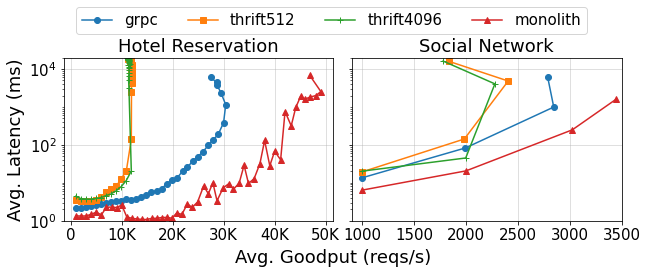

In [5]:
fig,axes = plt.subplots(figsize=(META_WIDTH*2,FIG_H_SIZE), nrows=1, ncols=2)
ax = axes[0]
ax.set_ylim(*PERF_Y_LIM)
#ax.set_xlabel('Avg. Goodput (reqs/s)', fontsize=LABEL_SIZE)
ax.set_ylabel('Avg. Latency (ms)', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=TICK_SIZE)
#plt.tick_params(axis='y', which='minor')
ax.set_xticks(ticks=[0, 10000, 20000, 30000, 40000, 50000])
ax.set_yticks(ticks=[10, 100, 1000, 10000])
ax.set_xticklabels(["0", "10K", "20K", "30K", "40K", "50K"])
ax.set_yticklabels(["10", "10^2", "10^3", "10^4"])
ax.grid(visible=True, which='major', axis='both', alpha=0.5)
ax.set_yscale('log')
i = 0
markers = ['o', 's', '+','^']
rpcs = ['grpc', 'thrift_512', 'thrift_4096', 'monolith']
for s in rpcs:
    df = pd.read_csv(DATA_DIR + 'hotel_blueprint_' + s + "_consolidated.csv")
    ax.plot(df.avg_tput,df.avg_latency, label=s.replace("_",""),marker=markers[i])
    i += 1
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_title("Hotel Reservation", fontsize=LABEL_SIZE)

systems = ['blueprint_grpc','blueprint_thrift512', 'blueprint_thrift4096', 'blueprint_monolith']
ax = axes[1]
ax.set_title("Social Network", fontsize=LABEL_SIZE)
ax.tick_params(labelsize=TICK_SIZE)
ax.set_ylim(*PERF_Y_LIM)
ax.grid(visible=True, which='major', axis='both', alpha=0.5)
ax.set_yscale('log')
ax.set_xlim([900,3500])
ax.set_xticks(ticks=[1000, 1500, 2000, 2500, 3000, 3500])
ax.set_yticklabels([])
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(NullFormatter())
i = 0
for s in systems:
    df = pd.read_csv(DATA_DIR + 'socialnetwork_' + s + "_consolidated.csv")
    ax.plot(df.avg_tput[:4],df.avg_latency[:4], label=s.replace("blueprint_", ""),marker=markers[i])
    i += 1
fig.text(0.5, -0.07, 'Avg. Goodput (reqs/s)', ha='center', fontsize=LABEL_SIZE)
plt.legend(fontsize=LEGEND_SIZE, ncol=4, bbox_to_anchor=(0.9,1.1), loc="lower right")
plt.subplots_adjust(wspace=0.07, hspace=0)
plt.savefig('dsb_hr_perf_exploration.pdf', bbox_inches='tight')
plt.show()